# Packages & Imports

In [ ]:
!python -m pip install pandas
!python -m pip install numpy
!python -m pip install matplotlib
!python -m pip install opencv-python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from helios import Helios

# Dataset and Subdivision

In [3]:
# reading the 04-05 data from the csv
df_04 = pd.read_csv('dataset/Solar_flare_RHESSI_2004_05.csv')

# changing the month values for the year 2005 (1 = 13, 2 = 14, etc.) to make subdivision simpler later on
# in rows where the year value is 2005, add 12 to the month value and replace the old month value
df_04['month'] = np.where((df_04['year'] == 2005), df_04['month'] + 12, df_04['month'])
# list that will hold sets of 4 with a two month overlap
dfs_04 = []

# grouping the data frame by month nummber
df_m = df_04.groupby(['month'])

for i in range(4, 25, 2):
    # get groups for i - 3th, i - 2th, i - 1th, and ith months, 
    # concatenate them into a single data frame, then append this to the dfs list
    dfs_04.append(pd.concat([df_m.get_group(i - 3), df_m.get_group(i - 2), df_m.get_group(i - 1), df_m.get_group(i)]))



# same thing but with the 15-16 data
df_15 = pd.read_csv('dataset/Solar_flare_RHESSI_2015_16.csv')
df_15['month'] = np.where((df_15['year'] == 2016), df_15['month'] + 12, df_15['month'])
dfs_15 = []
df_n = df_15.groupby(['month'])

# accounting for the lack of data for months 3 and 4 in 2015
for i in range(4, 14, 2):
    dfs_15.append(pd.concat([df_n.get_group(i - 3), df_n.get_group(i - 2), df_n.get_group(i - 1), df_n.get_group(i)]))

for i in range(20, 25, 2):
    dfs_15.append(pd.concat([df_n.get_group(i - 3), df_n.get_group(i - 2), df_n.get_group(i - 1), df_n.get_group(i)]))

# Change Analysis

## Change Between Months 1-4

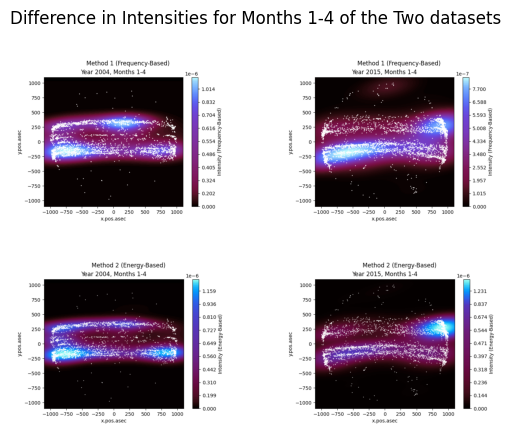

In [9]:
helios = Helios()
row = 2
columns = 2

s1 = dfs_04[0]
s2 = dfs_15[0]

helios.intensity_estimation_frequency(s1, plot=True, show=False, scatter=True, levels=100)
helios.intensity_estimation_energy(s1, plot=True, show=False, scatter=True, levels=100)
helios.intensity_estimation_frequency(s2, plot=True, show=False, scatter=True, levels=100)
helios.intensity_estimation_energy(s2, plot=True, show=False, scatter=True, levels=100)

# plot months 1-4 for each data set

fig1 = plt.figure()
plt.suptitle('Difference in Intensities for Months 1-4 of the Two datasets')
image1 = cv2.imread('output/intensity_frequency_2004_1-4.png')
image2 = cv2.imread('output/intensity_energy_2004_1-4.png')
image3 = cv2.imread('output/intensity_frequency_2015_1-4.png')
image4 = cv2.imread('output/intensity_energy_2015_1-4.png')

fig1.add_subplot(row, columns, 1)
plt.imshow(image1)
plt.axis('off')

fig1.add_subplot(row, columns, 2)
plt.imshow(image3)
plt.axis('off')

fig1.add_subplot(row, columns, 3)
plt.imshow(image2)
plt.axis('off')

fig1.add_subplot(row, columns, 4)
plt.imshow(image4)
plt.axis('off')

plt.savefig(f"./output/Months_1-4_groupings.png")
plt.show()

## Change Between Months 21-24

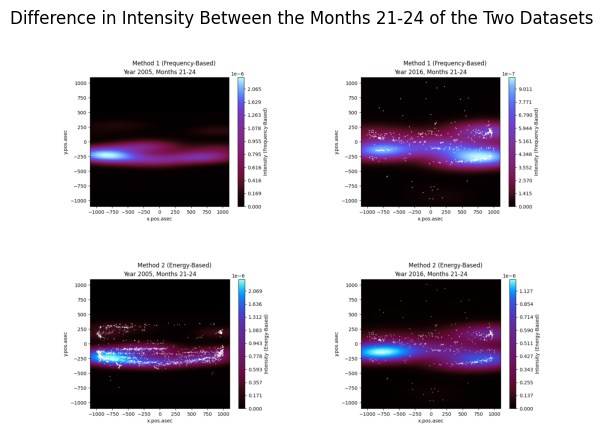

In [10]:
# computing plots for months 21-24 for each dataset

s1 = dfs_04[-1]
s2 = dfs_15[-1]
helios.intensity_estimation_frequency(s1, plot=True, show=False, scatter=True, levels=100)
helios.intensity_estimation_energy(s1, plot=True, show=False, scatter=True, levels=100)
helios.intensity_estimation_frequency(s2, plot=True, show=False, scatter=True, levels=100)
helios.intensity_estimation_energy(s2, plot=True, show=False, scatter=True, levels=100)

# plot months 21-24 for each data set

fig2 = plt.figure()
plt.suptitle('Difference in Intensity Between the Months 21-24 of the Two Datasets')
image1 = cv2.imread('output/intensity_frequency_2005_21-24.png')
image2 = cv2.imread('output/intensity_energy_2005_21-24.png')
image3 = cv2.imread('output/intensity_frequency_2016_21-24.png')
image4 = cv2.imread('output/intensity_energy_2016_21-24.png')

fig2.add_subplot(row, columns, 1)
plt.imshow(image1)
plt.axis('off')

fig2.add_subplot(row, columns, 2)
plt.imshow(image3)
plt.axis('off')

fig2.add_subplot(row, columns, 3)
plt.imshow(image2)
plt.axis('off')

fig2.add_subplot(row, columns, 4)
plt.imshow(image4)
plt.axis('off')

plt.savefig(f"./output/Months_21-24_groupings.png")
plt.show()

## Change Between the Entire Datasets

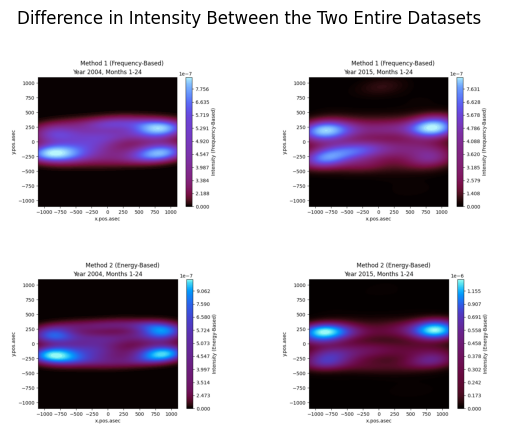

In [12]:
# computing plots for all 24 months for each dataset

s1 = df_04
s2 = df_15
helios.intensity_estimation_frequency(s1, plot=True, show=False, scatter=False, levels=100)
helios.intensity_estimation_energy(s1, plot=True, show=False, scatter=False, levels=100)
helios.intensity_estimation_frequency(s2, plot=True, show=False, scatter=False, levels=100)
helios.intensity_estimation_energy(s2, plot=True, show=False, scatter=False, levels=100)

# plot months 1-24 for each dataset

fig3 = plt.figure()
plt.suptitle('Difference in Intensity Between the Two Entire Datasets')
image1 = cv2.imread('output/intensity_frequency_2004_1-24.png')
image2 = cv2.imread('output/intensity_energy_2004_1-24.png')
image3 = cv2.imread('output/intensity_frequency_2015_1-24.png')
image4 = cv2.imread('output/intensity_energy_2015_1-24.png')

fig3.add_subplot(row, columns, 1)
plt.imshow(image1, cmap='hot')
plt.axis('off')

fig3.add_subplot(row, columns, 2)
plt.imshow(image3)
plt.axis('off')

fig3.add_subplot(row, columns, 3)
plt.imshow(image2)
plt.axis('off')

fig3.add_subplot(row, columns, 4)
plt.imshow(image4)
plt.axis('off')

plt.savefig(f"./output/Months_1-24_groupings.png")
plt.show()

# Basic Statistics

In [13]:
# converting basic statistics into a pandas dataframe for easier interpretation
helios = Helios()

length = len(df_04)
intensities_freq_avg = np.mean(helios.intensity_estimation_frequency(df_04, plot=False))
intensities_ener_avg = np.mean(helios.intensity_estimation_energy(df_04, plot=False))

stats_04 = np.array([length, intensities_freq_avg, intensities_ener_avg])

length = len(df_15)
intensities_freq_avg = np.mean(helios.intensity_estimation_frequency(df_15, plot=False))
intensities_ener_avg = np.mean(helios.intensity_estimation_energy(df_15, plot=False))

stats_15 = np.array([length, intensities_freq_avg, intensities_ener_avg])

stack = np.vstack([stats_04, stats_15])

stats = pd.DataFrame(stack, columns=['Number Of Events', 'Avg. Intensity (Frequency)', 'Normalized Avg. Intensity (Energy)'], index=['2004-2005', '2015-2016'])
stats

,Number Of Events,Avg. Intensity (Frequency),Normalized Avg. Intensity (Energy)
2004-2005,17506.0,5.746318e-07,0.003035
2015-2016,10779.0,5.503549e-07,0.004541
